In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
iris=load_iris()
X=pd.DataFrame(iris['data'],columns=['sepal length in cm','sepal width','petal length','petal width'])
y=iris['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [8]:
X_train.head()

,sepal length in cm,sepal width,petal length,petal width
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9


In [21]:
X_train["petal width"].min()

0.1

In [13]:
y_train[:5]

array([1, 1, 2, 2, 2])

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

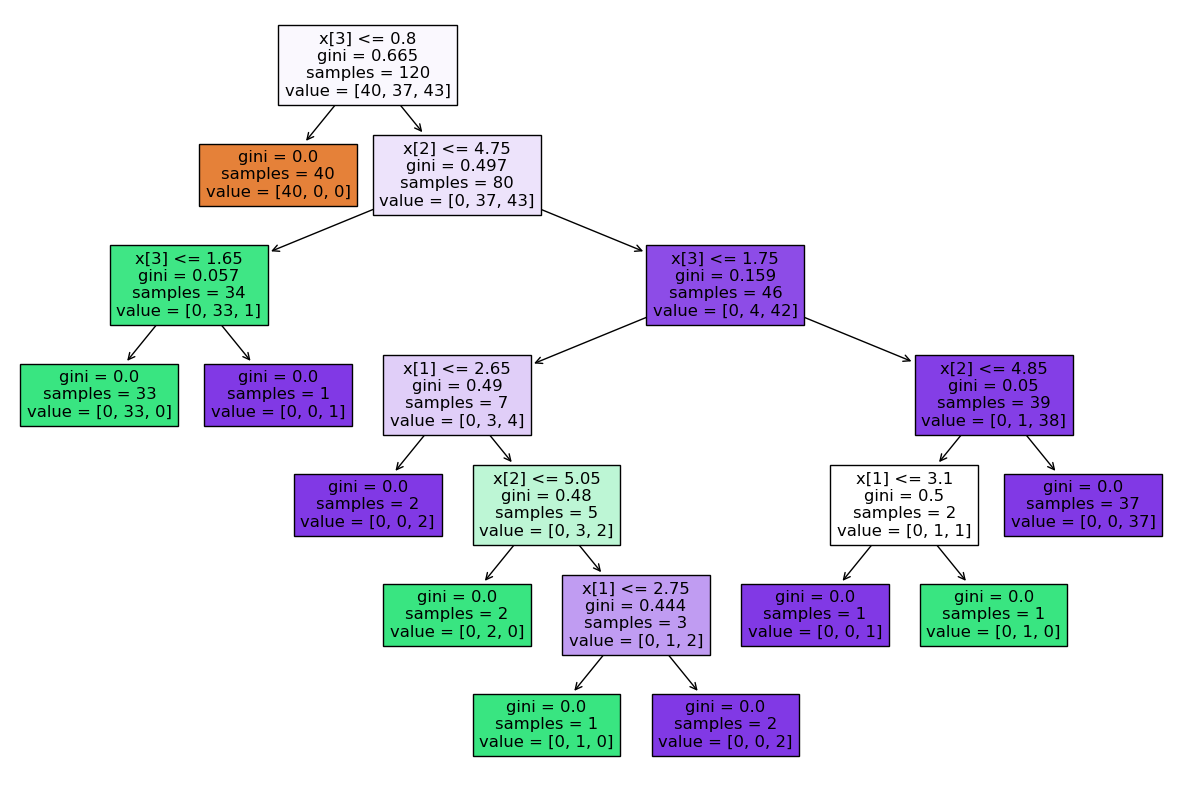

In [19]:
# visualise the tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [26]:
y_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)

In [28]:
## overfitting
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_pred))

1.0
0.9666666666666667


In [29]:
# postprunning using the max_depth param
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

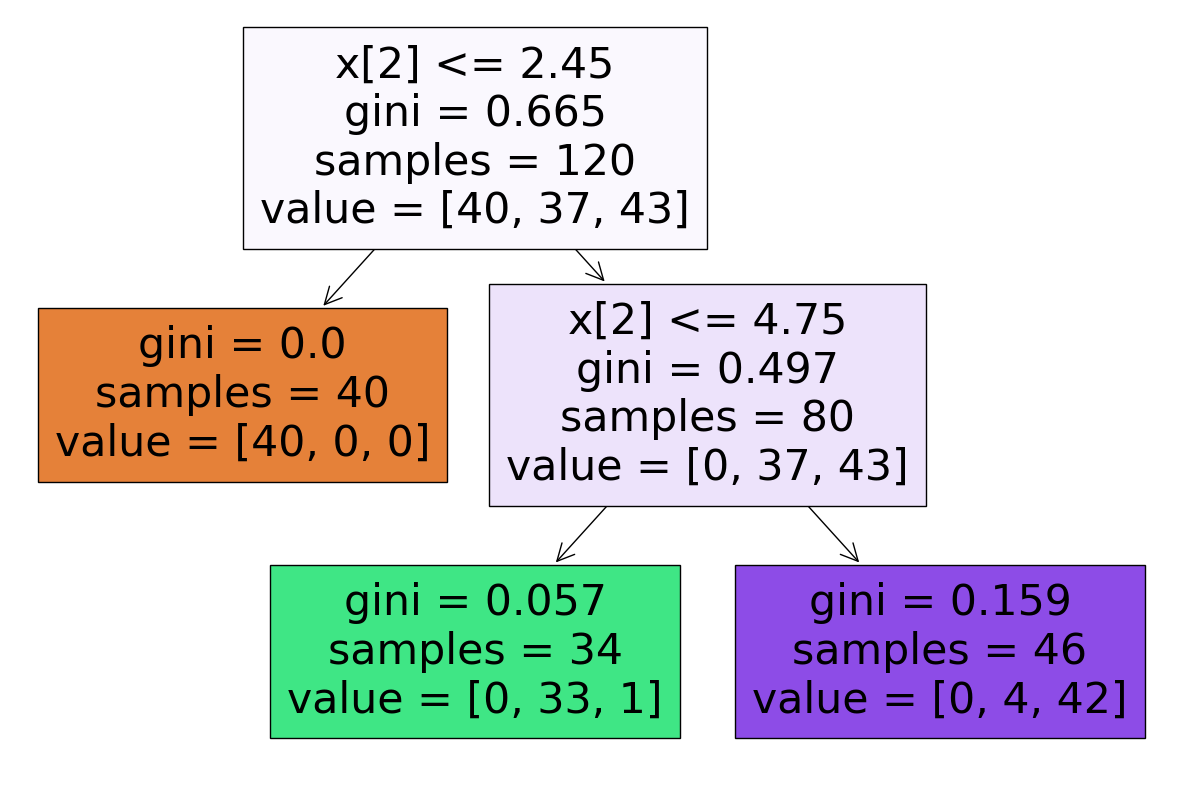

In [30]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [31]:
y_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_pred))

0.9583333333333334
0.9333333333333333


In [33]:
# prepruning is better than post prunning because datset is not always small
# prepruning ---> hyperparam tuning
param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [37]:
treemodel=DecisionTreeClassifier()
grid=GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [38]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [39]:
grid.best_score_

0.95

In [40]:
y_pred = grid.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0
